## Nearest Neighbor on MNIST Dataset

**Note: Whenever you see '...', replace with a line of code**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random

In [ ]:
train_data = pd.read_csv('mnist-in-csv/mnist_train_1.csv')
train_data = train_data.append(pd.read_csv('mnist-in-csv/mnist_train_2.csv')).reset_index(drop=True)
test_data = pd.read_csv('mnist-in-csv/mnist_test.csv')

In [ ]:
X_train = train_data[train_data.columns[1:]]
X_test = test_data[test_data.columns[1:]]
y_train = train_data['label']
y_test = test_data['label']

Using the PCA class from sklearn, fit to your training data and transform your train and test set accordingly.  Each data set should only have 30 elements per data sample after transforming via PCA.
Hint: your train_data should have the shape (60000, 30).  Check this with the following command: X_train_pca.shape

In [4]:
pca = PCA(n_components=30)  # Initialize a PCA object that will cut our dimensions to 30

In [5]:
### Fit PCA to our training data, then transform X_train and X_test
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Implement a KNN classifier using the KNeighborsClassifier from sklearn. Fit to your train_pca data, then generate predictions on your test_pca data.

Note: Generating predictions will talk approximately 20-25 seconds when you have 30 components via PCA.

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)  # Intialize KNeighborsClassifier with a value of k <= 7

In [13]:
knn.fit(X_train_pca, y_train)   # Fit knn classifier to X_train_pca, y_train_pca
pred = knn.predict(X_test_pca)   # Generate predictions based on X_test

In [9]:
sum(pred == y_test) / len(pred)  # Outputs the accuracy score for your model

0.9755

Note that there are two parameters you can change in this process that will affect model accuracy: Number of components for PCA, and the value of k in the KNeighbors Classifier.  Try to adjust these parameters to achieve optimal model accuracy.  

Keep in mind that the runtime of kNN is approximately linear as you increase the number of components in PCA.  Ideally, PCA should have <= 100 components to avoid long runtimes.

**Visualization**

The below cell will plot 10 examples from our test set at random, and print the corresponding prediction our model made.

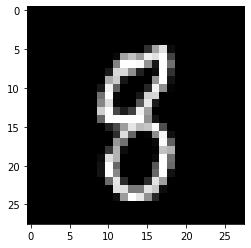

Prediction: 8
Correct: 8



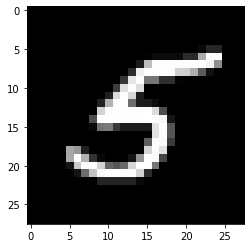

Prediction: 5
Correct: 5



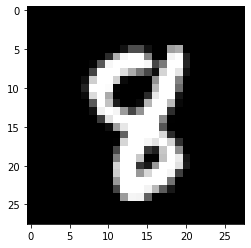

Prediction: 8
Correct: 8



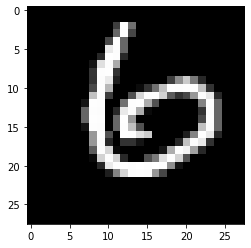

Prediction: 6
Correct: 6



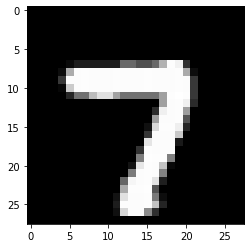

Prediction: 7
Correct: 7



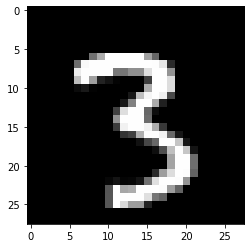

Prediction: 3
Correct: 3



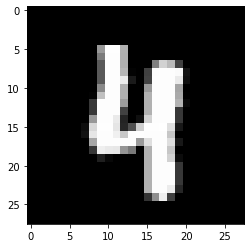

Prediction: 4
Correct: 4



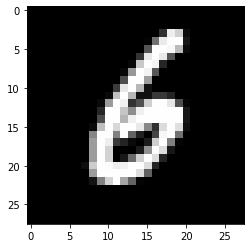

Prediction: 6
Correct: 6



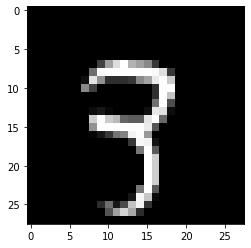

Prediction: 7
Correct: 3



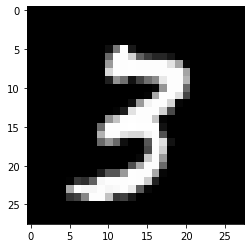

Prediction: 3
Correct: 3



In [11]:
indices = random.choices(range(len(X_test)), k=10)
for i in indices:
    plt.imshow(X_test.loc[i].values.reshape((28,28)), cmap='gray')
    plt.show()
    print("Prediction:", pred[i])
    print("Correct:", y_test.loc[i])
    print()

**Optional:**

Implement Nearest Neighbor Classifier.  Using Euclidean distance, find the closest point in the training set to each row in the test set, and return the class of the closest point.

Hint: Use np.argmin() to find the index of the smallest value in an array.

In [ ]:
...

In [ ]:
pred = ...

In [ ]:
sum(np.array(pred) == y_test.values)